### First, let's bring in some data.

In [12]:
# Imports and helper functions

import accidentHandler as aH
import numpy as np
import pandas as pd
import riskModelBuilder as rMB
import seaborn as sb
from matplotlib import pyplot as plt

from sklearn import preprocessing as skpre
from sklearn import linear_model
from sklearn.cross_validation import cross_val_predict
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split


%matplotlib inline

### Accident data.

In [11]:
accdf = pd.read_csv('/home/louisf/Documents/Insight/massdriver/data/accidents_3yr', low_memory=False)

### Next, let's load in a post-imputed data set. We then add a new column which is the number of accidents.

In [161]:
roaddf = pd.read_csv('/home/louisf/Documents/Insight/massdriver/data/intermediateGraphDB.csv')



In [17]:
accdf.columns

Index(['Unnamed: 0', 'crashnumber', 'crashdate', 'crashtime', 'crashhour',
       'city/town', 'locality', 'rpaabbreviation', 'masshighwaydistrict',
       'crashseverity', 'maximuminjuryseverityreported',
       'numberofnonfatalinjuries', 'numberoffatalinjuries', 'numberofvehicles',
       'mannerofcollision', 'vehicleactionpriortocrash',
       'vehicletraveldirections', 'firstharmfulevent',
       'firstharmfuleventlocation', 'mostharmfulevents',
       'vehiclesequenceofevents', 'vehicleconfiguration', 'fmscareportable',
       'ageofdriver-youngestknown', 'ageofdriver-oldestknown',
       'drivercontributingcodes', 'nonmotoristtype', 'nonmotoristaction',
       'nonmotoristlocation', 'hit&run', 'roadsurface', 'ambientlight',
       'weathercondition', 'streetnumber', 'roadway',
       'distanceanddirectionfromintersection', 'nearintersectionroadway',
       'exitroute', 'distanceanddirectionfromexitnumber', 'exitnumber',
       'milemarkerroute', 'distanceanddirectionfrommilemark

In [33]:
accdf['numaccidents']=1

Index(['Unnamed: 0', 'accesscont', 'addedroadt', 'adt', 'adtderivat',
       'adtyear', 'assigned_1', 'assignedle', 'city', 'county', 'curbs',
       'equation_1', 'equationro', 'facilityty', 'federalaid', 'federalfun',
       'fromendtyp', 'frommeasur', 'fromstreet', 'functional', 'hpmscode',
       'leftshou_1', 'leftshould', 'leftsidewa', 'lifecycles', 'massdothig',
       'mediantype', 'medianwidt', 'mhs', 'mileagecou', 'mpo', 'municipals',
       'nhsstatus', 'numberofpe', 'numberoftr', 'psi', 'psiyear', 'rightofway',
       'rightsho_1', 'rightshoul', 'rightsidew', 'roadsegmen', 'routedirec',
       'routefrom', 'routekey', 'routenumbe', 'routesyste', 'routeto',
       'routetype', 'rpa', 'shape_len', 'speedlimit', 'streetlist',
       'streetna_1', 'streetname', 'streetoper', 'structural', 'surfacetyp',
       'surfacewid', 'terrain', 'toendtype', 'tollroad', 'tomeasure',
       'tostreetna', 'trucknetwo', 'truckroute', 'undivide_1', 'undividedl',
       'urbanizeda', 'urbantype

In [39]:
numaccidents = grouped.agg(sum).numaccidents
numaccidents.index.name = 'roadsegmen'

In [40]:
df2 = roaddf.join(numaccidents, on=road)
df2.numaccidents[pd.isnull(df2.numaccidents)] = 0

In [63]:
df2['accidentspersegment']=df2['numaccidents']/df2['assignedle']

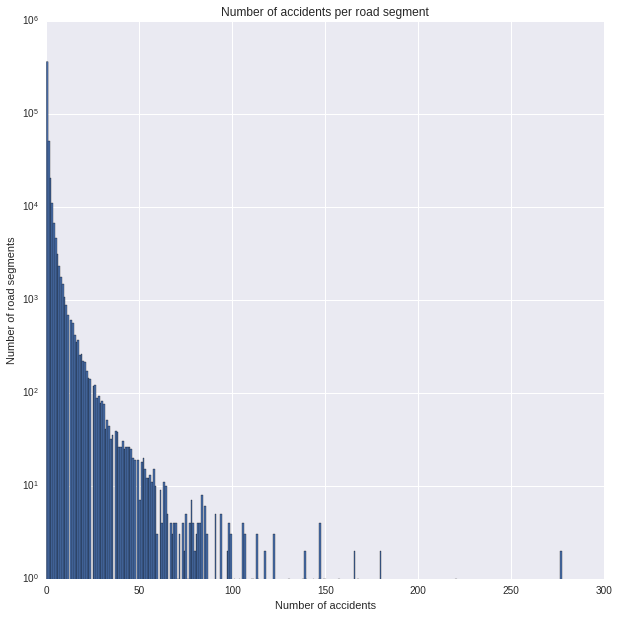

In [59]:
fig = plt.figure(figsize=(10,10))
ax = plt.hist(df2.numaccidents/df2., bins=300)
plt.yscale('log')
plt.title('Number of accidents per road segment')
plt.xlabel('Number of accidents')
plt.ylabel('Number of road segments')
plt.savefig('numberofAccidents.png', dpi=300)

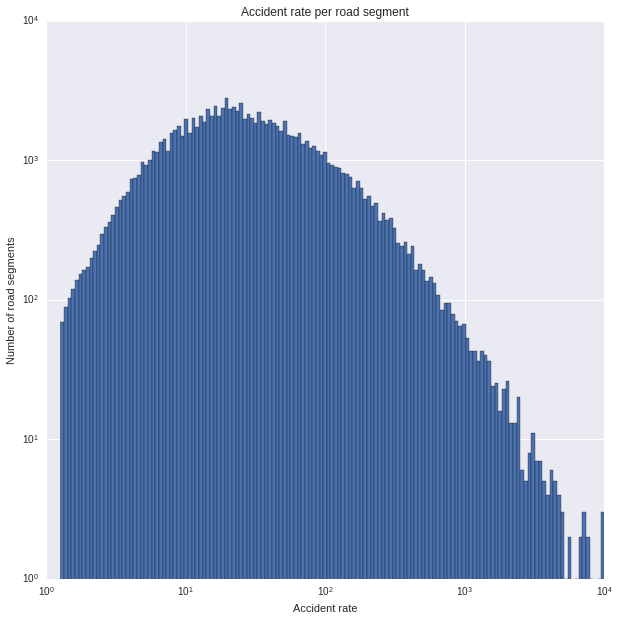

In [70]:
fig = plt.figure(figsize=(10,10))
ax = plt.hist(df2.accidentspersegment, bins=np.logspace(0.1, 4,150 )) #pl.hist(data, bins=np.logspace(0.1, 1.0, 50))
plt.yscale('log')
plt.xscale('log')
plt.title('Accident rate per road segment')
plt.xlabel('Accident rate')
plt.ylabel('Number of road segments')
plt.savefig('rateofAccidents.png', dpi=300)

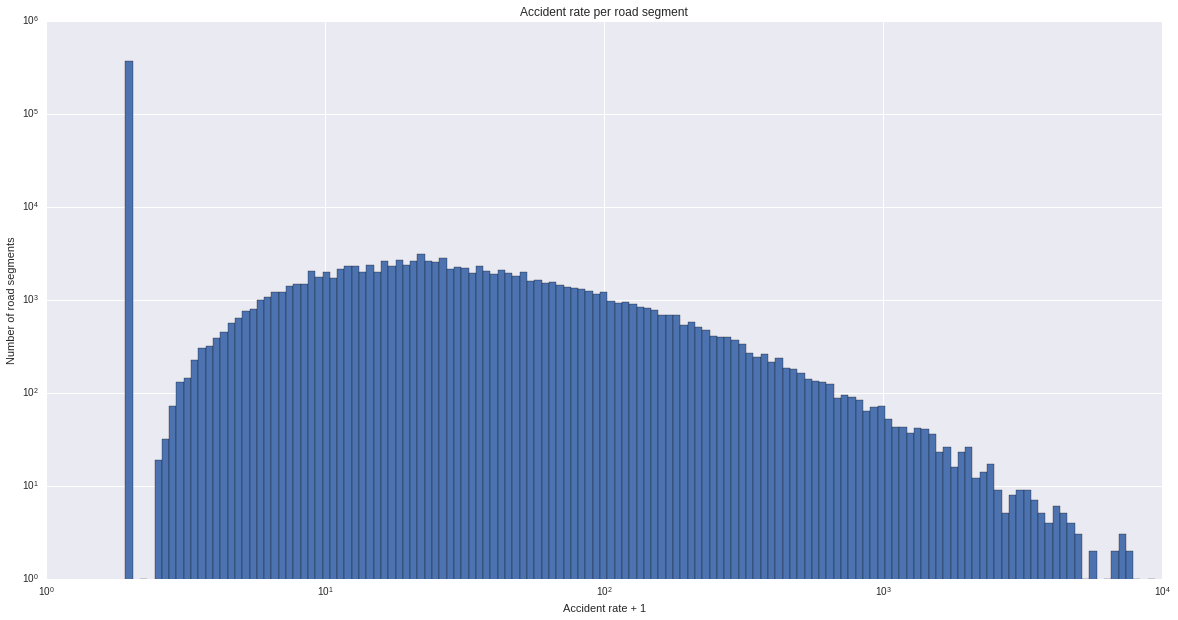

In [264]:
fig = plt.figure(figsize=(20,10))
ax = plt.hist(2+df2.accidentspersegment, bins=np.logspace(.1,4,150)) #pl.hist(data, bins=np.logspace(0.1, 1.0, 50))
plt.yscale('log')
plt.xscale('log')
plt.title('Accident rate per road segment')
plt.xlabel('Accident rate + 1')
plt.ylabel('Number of road segments')
plt.savefig('rateofAccidents.png', dpi=300)

### Now it's time to start assigning categorical variables to this mess.

In [272]:
# Bring in the requirements document.
pathtoreqs = '/home/louisf/Documents/Insight/massdriver/docs/road_inventory_params.csv'
reqs = pd.read_csv(pathtoreqs, delimiter = '^')

In [271]:
replaceMe = reqs[(reqs['Categorical']==True) & (reqs['Disqualify']==False)]
test = roaddf.copy()

In [273]:
for variable in replaceMe.Variable:
    dummycat = pd.get_dummies(test[variable], prefix=variable)
    test.drop(variable, inplace=True, axis=1)
    test = test.join(dummycat, how='right')

In [274]:
dropdisq = reqs[reqs['Disqualify']==True]
for var in dropdisq['Variable']:
    try:
        test.drop(var, inplace=True, axis=1)
    except ValueError:
        print("{} not found".format(var))

adtstation not found
crn not found
dateactive not found
fromcity not found
fromstate not found
futurefaci not found
hpmssample not found
iri not found
iristatus not found
iriyear not found
item_id not found
jurisdicti not found
opposingdi not found
oppositenu not found
roadinvent not found
routequali not found
subroute not found
tocity not found
tostate not found


###  Clear the memory here!

In [292]:
del reqs
del roaddf
del grouped
del dropdisq

In [2]:
catDF = pd.DataFrame.from_csv('~/Documents/Insight/massdriver/data/categoricalDF.csv')

In [3]:
nparr = np.asarray(catDF)

### Predict!

In [9]:
m = rMB.Model()

/home/louisf/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


In [28]:
# Split up the data 

test_size = 0.2

coltodrop = [0, 14, 640, 641]
X = np.delete(nparr, coltodrop, axis=1)
y = nparr[:,-2]

x_train, x_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size)



KeyboardInterrupt: 

In [29]:
# Perform training 
score, oob_score, rf_pred, x_val, y_val, rf = m.rf_regression(x_train, y_train, 100, 0.2)

In [32]:
score2, oob_score2, rf_pred2, x_val2, y_val2, rf2 = m.rf_regression(x_train, y_train, 200, 0.2)

KeyboardInterrupt: 